In [69]:
import numpy as np
import pandas as pd

# Preprocessing


**Wrangling**

In [70]:
# Read the data
df=pd.read_csv('/Fraud.csv')
# Shape the data
df.shape

(1048575, 11)

In [71]:
# Get head of the data
df.head(300)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
295,1,PAYMENT,993.46,C1548946718,19448.00,18454.54,M1814423236,0.00,0.00,0,0
296,1,CASH_OUT,302693.14,C140404585,18454.54,0.00,C1688019098,306239.03,97263.78,0,0
297,1,PAYMENT,1445.06,C207546206,10892.00,9446.94,M1218519094,0.00,0.00,0,0
298,1,PAYMENT,4059.25,C200404000,4186.00,126.75,M1894758168,0.00,0.00,0,0


In [72]:
df.tail(300)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1048275,95,PAYMENT,3404.56,C2095106077,9135.00,5730.44,M1159868298,0.00,0.00,0,0
1048276,95,CASH_IN,29380.57,C400750033,20523.00,49903.57,C283438643,1730590.65,1701210.08,0,0
1048277,95,CASH_OUT,129320.69,C1686654630,49903.57,0.00,C1619152430,758517.76,887838.46,0,0
1048278,95,PAYMENT,7061.49,C517128714,30098.00,23036.51,M1247342629,0.00,0.00,0,0
1048279,95,DEBIT,2555.34,C1242876098,158568.00,156012.66,C276222289,572398.58,574953.92,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0,0
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0,0
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0,0
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0,0


**Analysis** 

In [73]:
# Check for null values
df.isnull().values.any()

False

In [74]:
# Getting information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
 10  isFlaggedFraud  1048575 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 88.0+ MB


In [75]:
legit = len(df[df.isFraud == 0])
fraud = len(df[df.isFraud == 1])
legit_percent = (legit / (fraud + legit)) * 100
fraud_percent = (fraud / (fraud + legit)) * 100

print("Number of Legit transactions: ", legit)
print("Number of Fraud transactions: ", fraud)
print("Percentage of Legit transactions: {:.4f} %".format(legit_percent))
print("Percentage of Fraud transactions: {:.4f} %".format(fraud_percent))

Number of Legit transactions:  1047433
Number of Fraud transactions:  1142
Percentage of Legit transactions: 99.8911 %
Percentage of Fraud transactions: 0.1089 %


In [76]:
# Merchants
X = df[df['nameDest'].str.contains('M')]
X.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0,0
6,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.0,0,0


# Visualisation 

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

 **Correlation Heatmap**

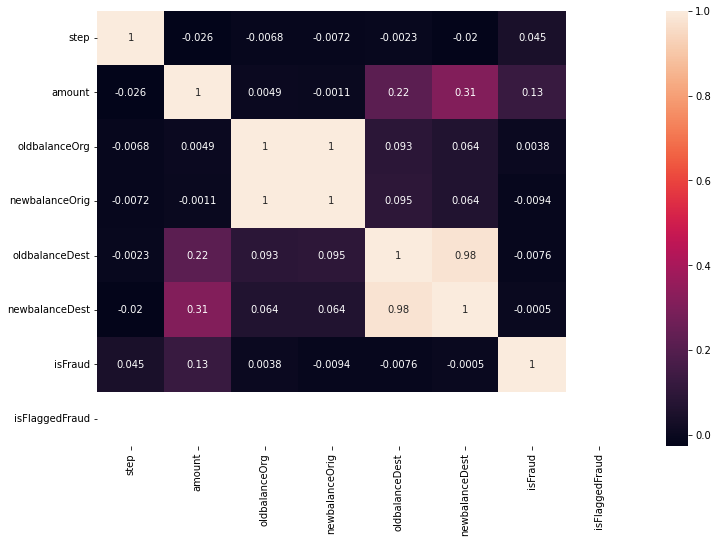

In [78]:
corr=df.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr,annot=True)

**Number of legit and fraud transactions**

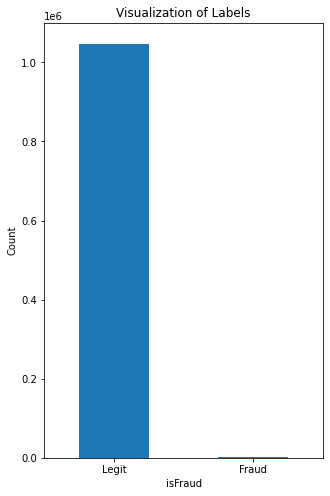

In [79]:
plt.figure(figsize=(5,8))
labels = ["Legit", "Fraud"]
count_classes = df.value_counts(df['isFraud'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

# Problem Solving 

In [80]:
#creating a copy of original dataset to train and test models

new_df=df.copy()
new_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


**Label Encoding**

In [81]:
# Checking how many attributes are dtype: object

objList = new_df.select_dtypes(include = "object").columns
print (objList)

Index(['type', 'nameOrig', 'nameDest'], dtype='object')


In [82]:
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    new_df[feat] = le.fit_transform(new_df[feat].astype(str))

print (new_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  int64  
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  int64  
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  int64  
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
 10  isFlaggedFraud  1048575 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 88.0 MB
None


In [83]:
new_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,125164,170136.0,160296.36,274917,0.0,0.0,0,0
1,1,3,1864.28,361319,21249.0,19384.72,286716,0.0,0.0,0,0
2,1,4,181.00,165236,181.0,0.00,73550,0.0,0.0,1,0
3,1,1,181.00,961662,181.0,0.00,65464,21182.0,0.0,1,0
4,1,3,11668.14,567915,41554.0,29885.86,138001,0.0,0.0,0,0


**Multicolinearity**

In [84]:
# Import library for VIF (VARIANCE INFLATION FACTOR)

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(df):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

    return(vif)

calc_vif(new_df)

/usr/local/lib/python3.8/dist-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,variables,VIF
0,step,2.877871
1,type,5.055132
2,amount,2.126342
3,nameOrig,2.857206
4,oldbalanceOrg,709.443407
5,newbalanceOrig,716.622550
6,nameDest,3.823784
7,oldbalanceDest,38.440149
8,newbalanceDest,41.277884
9,isFraud,1.134756


In [85]:
new_df['Actual_amount_orig'] = new_df.apply(lambda x: x['oldbalanceOrg'] - x['newbalanceOrig'],axis=1)
new_df['Actual_amount_dest'] = new_df.apply(lambda x: x['oldbalanceDest'] - x['newbalanceDest'],axis=1)
new_df['TransactionPath'] = new_df.apply(lambda x: x['nameOrig'] + x['nameDest'],axis=1)

#Dropping columns
new_df = new_df.drop(['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','step','nameOrig','nameDest'],axis=1)

calc_vif(new_df)

/usr/local/lib/python3.8/dist-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,variables,VIF
0,type,2.762248
1,amount,1.741115
2,isFraud,1.125764
3,isFlaggedFraud,NaN
4,Actual_amount_orig,1.281362
5,Actual_amount_dest,1.557032
6,TransactionPath,2.724219


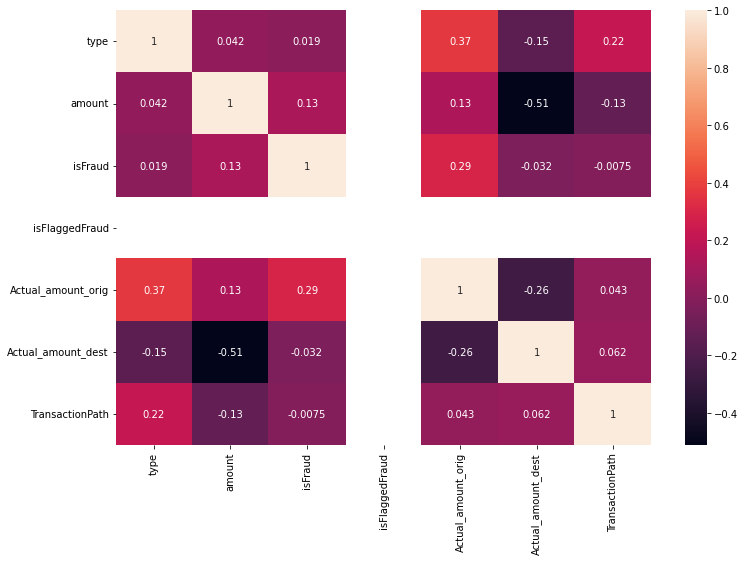

In [86]:
corr=new_df.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr,annot=True)

# Model Building 

In [87]:
#model building 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import itertools
from collections import Counter
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

**Normalizing (Scaling) Amount**




In [88]:
# Perform Scaling
scaler = StandardScaler()
new_df["NormalizedAmount"] = scaler.fit_transform(new_df["amount"].values.reshape(-1, 1))
new_df.drop(["amount"], inplace= True, axis= 1)

Y = new_df["isFraud"]
X = new_df.drop(["isFraud"], axis= 1)

**Train-test split**

In [89]:
# Split the data
(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, test_size= 0.3, random_state= 42)

print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (734002, 6)
Shape of X_test:  (314573, 6)


 **Model Training** 

In [90]:
# DECISION TREE

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

Y_pred_dt = decision_tree.predict(X_test)
decision_tree_score = decision_tree.score(X_test, Y_test) * 100

In [91]:
# RANDOM FOREST

random_forest = RandomForestClassifier(n_estimators= 100)
random_forest.fit(X_train, Y_train)

Y_pred_rf = random_forest.predict(X_test)
random_forest_score = random_forest.score(X_test, Y_test) * 100

**Evaluation**

In [92]:
# Print scores of our classifiers

print("Decision Tree Score: ", decision_tree_score)
print("Random Forest Score: ", random_forest_score)

Decision Tree Score:  99.90812943259593
Random Forest Score:  99.95295209696954


In [93]:
# key terms of Confusion Matrix - DT

print("TP,FP,TN,FN - Decision Tree")
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_dt).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

print("----------------------------------------------------------------------------------------")

# key terms of Confusion Matrix - RF

print("TP,FP,TN,FN - Random Forest")
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_rf).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

TP,FP,TN,FN - Decision Tree
True Positives: 225
False Positives: 165
True Negatives: 314059
False Negatives: 124
----------------------------------------------------------------------------------------
TP,FP,TN,FN - Random Forest
True Positives: 228
False Positives: 27
True Negatives: 314197
False Negatives: 121



TP(Decision Tree) ~ TP(Random Forest) so no competetion here.

FP(Decision Tree) >> FP(Random Forest) - Random Forest has an edge

TN(Decision Tree) < TN(Random Forest) - Random Forest is better here too

FN(Decision Tree) ~ FN(Random Forest)


Here Random Forest looks good.

In [94]:
# confusion matrix - DT

confusion_matrix_dt = confusion_matrix(Y_test, Y_pred_dt.round())
print("Confusion Matrix - Decision Tree")
print(confusion_matrix_dt,)

print("----------------------------------------------------------------------------------------")

# confusion matrix - RF

confusion_matrix_rf = confusion_matrix(Y_test, Y_pred_rf.round())
print("Confusion Matrix - Random Forest")
print(confusion_matrix_rf)

Confusion Matrix - Decision Tree
[[314059    165]
 [   124    225]]
----------------------------------------------------------------------------------------
Confusion Matrix - Random Forest
[[314197     27]
 [   121    228]]


In [95]:
# classification report - DT

classification_report_dt = classification_report(Y_test, Y_pred_dt)
print("Classification Report - Decision Tree")
print(classification_report_dt)

print("----------------------------------------------------------------------------------------")

# classification report - RF

classification_report_rf = classification_report(Y_test, Y_pred_rf)
print("Classification Report - Random Forest")
print(classification_report_rf)

Classification Report - Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    314224
           1       0.58      0.64      0.61       349

    accuracy                           1.00    314573
   macro avg       0.79      0.82      0.80    314573
weighted avg       1.00      1.00      1.00    314573

----------------------------------------------------------------------------------------
Classification Report - Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    314224
           1       0.89      0.65      0.75       349

    accuracy                           1.00    314573
   macro avg       0.95      0.83      0.88    314573
weighted avg       1.00      1.00      1.00    314573



With Such a good precision and hence F1-Score, Random Forest comes out to be better as expected.

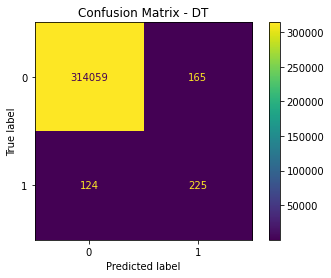

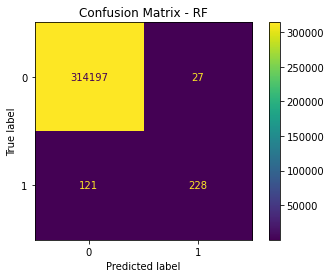

In [96]:
# visualising confusion matrix - DT


disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_dt)
disp.plot()
plt.title('Confusion Matrix - DT')
plt.show()

# visualising confusion matrix - RF
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_rf)
disp.plot()
plt.title('Confusion Matrix - RF')
plt.show()

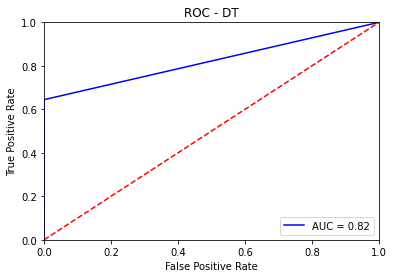

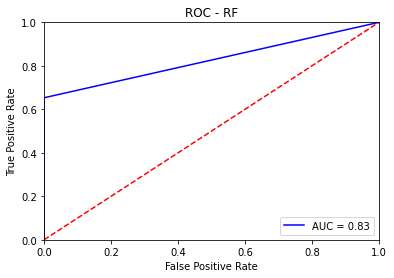

In [97]:
# AUC ROC - DT
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(Y_test, Y_pred_dt)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - DT')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# AUC ROC - RF
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(Y_test, Y_pred_rf)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - RF')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

THE AUC for both Decision Tree and Random Forest is equal, so both models are pretty good at what they do.

# Conclusion 

Describe your fraud detection model in elaboration. 

We have seen that Accuracy of both Random Forest and Decision Tree is equal, although teh precision of Random Forest is more. In a fraud detection model, Precision is highly important because rather than predicting normal transactions correctly we want Fraud transactions to be predicted correctly and Legit to be left off.If either of the two reasons are not fulfiiled we may catch the innocent and leave the culprit.This is also one of the reason why Random Forest and Decision Tree are used unstead of other algorithms.
Also the reason I have chosen this model is because of highly unbalanced dataset. Random forest makes multiple decision trees which makes it easier (although time taking) for model to understand the data in a simpler way since Decision Tree makes decisions in a boolean way.




How did you select variables to be included in the model?

Using the VIF values and correlation heatmap. We just need to check if there are any two attributes highly correlated to each other and then drop the one which is less correlated to the isFraud Attribute.

 What are the key factors that predict fraudulent customer? 

*   The source of request is secured or not ?
*  Is the name of organisation asking for money is legit or not ?
*  Transaction history of vendors.




What kind of prevention should be adopted while company update its infrastructure?

*  Use smart vertified apps only.
*  Browse through secured websites.
*  Use secured internet connections (USE VPN).
*  Keep your mobile and laptop security updated.
*  Don't respond to unsolicited calls/SMS(s/E-mails.
*  If you feel like you have been tricked or security compromised, contact your bank immidiately.





Assuming these actions have been implemented, how would you determine if they work?

* Bank sending E-statements.
* Always keep a log of your payments.
* Customers keeping a check of their account activity.


